# I. Introduction to the Data Science Project

### Problem Statement
This project aims to predict car sales prices using data science techniques. Car prices depend on many factors, such as the manufacturer, fuel efficiency, engine size, and the car's age. Predicting car prices helps sellers set competitive prices and assists buyers in making better decisions.

### Objectives
1. **Understand the Data**: Analyze and clean the data to ensure it is ready for modeling.
2. **Explore the Relationships**: Identify how features like mileage, manufacturer, and engine size affect car prices.
3. **Build a Predictive Model**: Train machine learning models to predict car prices accurately.
4. **Evaluate Performance**: Compare different models to find the one that works best for the data.

This project shows how data science can be applied to solve real-world problems and make accurate predictions.

# II. Dataset Selection and Description

### Dataset Source
The dataset used for this project is sourced from Kaggle: [Car Sales Dataset](https://www.kaggle.com/datasets/gagandeep16/car-sales?resource=download). It contains data about various car features and their corresponding sales prices.

### Description
This dataset includes details about cars, such as:
- Manufacturer and model.
- Engine size, horsepower, and fuel efficiency.
- Physical dimensions like length, width, and curb weight.
- Sales prices and resale value.

### Size and Characteristics
- **Number of Rows**: Contains thousands of records representing different car models.
- **Number of Columns**: Includes multiple features that impact car pricing.
- **File Type**: CSV (Comma Separated Values).
- **Potential Challenges**:
  - Missing values in certain columns.
  - Outliers that might affect the analysis.
  - Mixed data types (numerical and categorical features).

### Objective
This dataset provides the foundation for building a predictive model to estimate car prices based on their attributes. It requires cleaning, feature engineering, and advanced analysis to meet the project objectives.

# III. The Used Libraries  

In [48]:
# Pandas: For data manipulation and analysis
import pandas as pd

# NumPy: For numerical computations 
import numpy as np

# Matplotlib: For creating basic visualizations (e.g., scatter plots, bar charts)
import matplotlib.pyplot as plt

# Seaborn: For advanced and aesthetically pleasing statistical visualizations (e.g., heatmaps, box plots)
import seaborn as sns

# Scikit-learn: For machine learning models, preprocessing, and evaluation metrics
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.linear_model import LinearRegression  # For building a linear regression model
from sklearn.tree import DecisionTreeRegressor  # For building a decision tree regression model
from sklearn.ensemble import RandomForestRegressor  # For building a random forest regression model
from sklearn.preprocessing import MinMaxScaler  # To normalize numerical features
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # For evaluating model performance

# SciPy: For statistical tests (e.g., t-tests, Pearson correlation)
from scipy.stats import ttest_ind  # To compare mean prices between two manufacturers
from scipy.stats import pearsonr  # To calculate correlation and test its significance

# 1. Load and Inspect the Data

## Description
This step involves loading the car sales dataset using pandas and inspecting its structure. The first few rows are displayed to understand the columns, and summary information is provided to identify data types and missing values.

In [5]:
# Pandas library to load and manipulate the dataset
import pandas as pd

# File path to the dataset
file_path = r"Car_sales.csv" 
car_sales_data = pd.read_csv(file_path)

# Display the first five rows of the dataset
print(car_sales_data.head())

# Display summary information about the dataset
print(car_sales_data.info())


  Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0        Acura  Integra              16.919               16.360    Passenger   
1        Acura       TL              39.384               19.875    Passenger   
2        Acura       CL              14.114               18.225    Passenger   
3        Acura       RL               8.588               29.725    Passenger   
4         Audi       A4              20.397               22.255    Passenger   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0               21.50          1.8       140.0      101.2   67.3   172.4   
1               28.40          3.2       225.0      108.1   70.3   192.9   
2                 NaN          3.2       225.0      106.9   70.6   192.0   
3               42.00          3.5       210.0      114.6   71.4   196.6   
4               23.99          1.8       150.0      102.6   68.2   178.0   

   Curb_weight  Fuel_capacity  Fuel_efficiency Latest_La

## Explanation for the Output 
The dataset contains 157 rows and 16 columns. It includes car details like manufacturer, sales, price, and specifications. Some columns, such as Price_in_thousands and __year_resale_value, have missing values. This step gives an overview of the data structure and highlights columns requiring preprocessing.

# 2. Handle Missing Data

## Description
This step involves handling missing values in the dataset to ensure completeness. For numerical columns, missing values are replaced with the median, while categorical columns are filled with the most frequent value (mode).

In [52]:
# Fill missing values for numerical columns with their median
for column in car_sales_data.select_dtypes(include=['float64', 'int64']).columns:
    car_sales_data[column] = car_sales_data[column].fillna(car_sales_data[column].median())

# Fill missing values for categorical columns with their mode
for column in car_sales_data.select_dtypes(include=['object']).columns:
    car_sales_data[column] = car_sales_data[column].fillna(car_sales_data[column].mode()[0])

# Check for remaining missing values
print(car_sales_data.isnull().sum())


Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64


## Explanation for the Output 
All missing values are handled. Numerical columns use the median to avoid skewing data, while categorical columns use the most common value (mode). The dataset is now complete.

# 3. Identify and Handle Outliers

## Description
This step involves Identify, handle and removing outliers from the Price_in_thousands column  by using the Interquartile Range (IQR) method. This ensures accurate analysis by minimizing the influence of extreme values.

In [54]:
# Calculate the interquartile range (IQR)
Q1 = car_sales_data['Price_in_thousands'].quantile(0.25)  
Q3 = car_sales_data['Price_in_thousands'].quantile(0.75)  
IQR = Q3 - Q1  

# Define the lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the 'Price_in_thousands' column
outliers = car_sales_data[(car_sales_data['Price_in_thousands'] < lower_bound) |
                          (car_sales_data['Price_in_thousands'] > upper_bound)]
print("Number of outliers:", outliers.shape[0])  

# Remove rows with outliers in the 'Price_in_thousands' column
car_sales_data = car_sales_data[(car_sales_data['Price_in_thousands'] >= lower_bound) &
                                (car_sales_data['Price_in_thousands'] <= upper_bound)]

# Display the updated dataset shape after removing outliers
print("Data shape after outlier removal:", car_sales_data.shape)

Number of outliers: 9
Data shape after outlier removal: (148, 16)


## Explanation for the Output 
The output indicates that there were 9 outliers in the Price_in_thousands column. These rows had prices significantly higher or lower than the typical range defined by the interquartile range (IQR) method. After removing these outliers, the dataset now contains 148 rows and 16 columns, meaning the overall structure of the dataset remains intact, but it is now free from extreme values that could distort analysis or modeling results. This ensures a more accurate and reliable dataset for further analysis.

# 4. Descriptive Statistics

## Description
This step involves generating descriptive statistics to understand the central tendency, spread, and distribution of numerical columns in the dataset.

In [56]:
# Generate descriptive statistics for numerical columns
print(car_sales_data.describe())

       Sales_in_thousands  __year_resale_value  Price_in_thousands  \
count          148.000000           148.000000          148.000000   
mean            55.937270            15.499696           24.740135   
std             68.978728             6.262461            9.608345   
min              0.110000             5.160000            9.235000   
25%             15.824000            12.338750           17.793250   
50%             32.302500            14.180000           22.518500   
75%             70.466750            17.375000           29.340500   
max            540.561000            41.450000           51.728000   

       Engine_size  Horsepower   Wheelbase       Width      Length  \
count   148.000000  148.000000  148.000000  148.000000  148.000000   
mean      2.962838  178.557432  107.581757   71.049662  187.321622   
std       0.937451   47.490727    7.422186    3.475451   13.514928   
min       1.000000   55.000000   93.100000   62.600000  149.400000   
25%       2.275000 

## Explanation for the Output 
The summary provides key statistics like mean, median, standard deviation, and range for all numerical columns. These insights help identify data patterns and potential anomalies.

# 5. Encode Categorical Variables

## Description
This step involves encoding categorical variables into numerical form to make them suitable for machine learning models. Categorical columns, such as Manufacturer and Vehicle_type, are transformed using one-hot encoding. This method creates binary columns for each category, ensuring the dataset can be processed by algorithms that require numerical inputs.

In [58]:
# Encode categorical variables using one-hot encoding
car_sales_data_encoded = pd.get_dummies(car_sales_data, drop_first=True)

# View the encoded dataset
print(car_sales_data_encoded.head())

# Split the dataset into features (X) and target (y)
X = car_sales_data_encoded.drop(columns=['Price_in_thousands'])  # Features
y = car_sales_data_encoded['Price_in_thousands']  # Target

   Sales_in_thousands  __year_resale_value  Price_in_thousands  Engine_size  \
0              16.919               16.360              21.500          1.8   
1              39.384               19.875              28.400          3.2   
2              14.114               18.225              22.799          3.2   
3               8.588               29.725              42.000          3.5   
4              20.397               22.255              23.990          1.8   

   Horsepower  Wheelbase  Width  Length  Curb_weight  Fuel_capacity  ...  \
0       140.0      101.2   67.3   172.4        2.639           13.2  ...   
1       225.0      108.1   70.3   192.9        3.517           17.2  ...   
2       225.0      106.9   70.6   192.0        3.470           17.2  ...   
3       210.0      114.6   71.4   196.6        3.850           18.0  ...   
4       150.0      102.6   68.2   178.0        2.998           16.4  ...   

   Latest_Launch_9/1/2011  Latest_Launch_9/10/2012  Latest_Launch_9/

## Explanation for the Output 
The output shows the dataset after converting categorical data into numbers using one-hot encoding. Each unique value in the categorical columns, like Latest_Launch, is now a separate column with True or False values. For example, Latest_Launch_8/20/2012 indicates if a car was launched on that date. The dataset now has 307 columns, with the added binary columns replacing the original categorical ones. This format is ready for machine learning.

# 6. Normalize Numeric Features (Mileage and Price)

## Description
This step involves normalizing the numerical columns Price_in_thousands and Fuel_efficiency using Min-Max scaling. This method scales the values to a range between 0 and 1, ensuring consistency across features and improving the performance of machine learning models.

In [60]:
# Import the MinMaxScaler from scikit-learn
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to normalize 'Price_in_thousands' and 'Fuel_efficiency'
car_sales_data[['Price_in_thousands', 'Fuel_efficiency']] = scaler.fit_transform(
    car_sales_data[['Price_in_thousands', 'Fuel_efficiency']]
)

# Display the first 5 rows of the normalized columns
print(car_sales_data[['Price_in_thousands', 'Fuel_efficiency']].head())

   Price_in_thousands  Fuel_efficiency
0            0.288636         0.433333
1            0.451015         0.333333
2            0.319206         0.366667
3            0.771068         0.233333
4            0.347234         0.400000


## Explanation for the Output 
The output shows the normalized values for Price_in_thousands and Fuel_efficiency. The values are now scaled between 0 and 1 using Min-Max scaling. For example, the price of the first car (0.288636) and its fuel efficiency (0.433333) represent their relative positions within the range of all prices and fuel efficiency values in the dataset. This scaling ensures consistency and makes the data suitable for machine learning.

# 7. Split Data into Train and Test Sets

## Description
This step involves splitting the dataset into training and testing sets. The training set is used to train machine learning models, while the testing set is used to evaluate their performance on unseen data. Here, 80% of the data is allocated for training, and 20% is reserved for testing.

In [62]:
# Import train_test_split from scikit-learn
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = car_sales_data_encoded.drop(columns=['Price_in_thousands'])  # Features
y = car_sales_data_encoded['Price_in_thousands']  # Target variable

# Split the data into training and testing sets
# 80% of the data is used for training, and 20% is used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training data shape:", X_train.shape)  # Shape of the training data
print("Testing data shape:", X_test.shape)    # Shape of the testing data

Training data shape: (118, 309)
Testing data shape: (30, 309)


## Explanation for the Output 
The output shows that the dataset has been successfully split into training and testing sets. The training set contains 118 rows (80% of the data) with 309 features, while the testing set contains 30 rows (20% of the data) with the same number of features. This ensures that the model is trained on the majority of the data and tested on a separate portion to evaluate its performance.

# 8. Histogram of Car Prices

## Description
This step involves creating a histogram to visualize the distribution of car prices (Price_in_thousands) in the dataset. The histogram groups prices into intervals (bins) and shows how many cars fall into each price range. This helps identify the spread and concentration of prices in the data.

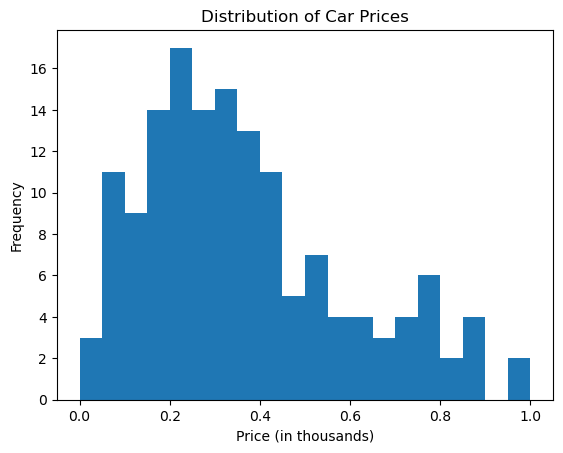

In [64]:
# Import Matplotlib for plotting
import matplotlib.pyplot as plt

# Create a histogram for 'Price_in_thousands'
plt.hist(car_sales_data['Price_in_thousands'], bins=20)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in thousands)')
plt.ylabel('Frequency')
plt.show()

## Explanation for the Output 
The histogram illustrates the distribution of car prices (Price_in_thousands) in the dataset. It groups prices into intervals (bins) and shows how many cars fall into each range. Peaks in the histogram represent price ranges with the highest number of cars, helping to identify common price points and the spread of car prices.

# 9. Scatter Plot of Mileage vs. Price

## Description
This step involves creating a scatter plot to visualize the relationship between car fuel efficiency (Fuel_efficiency) and price (Price_in_thousands). The plot helps identify trends, such as whether more fuel-efficient cars are generally more or less expensive.

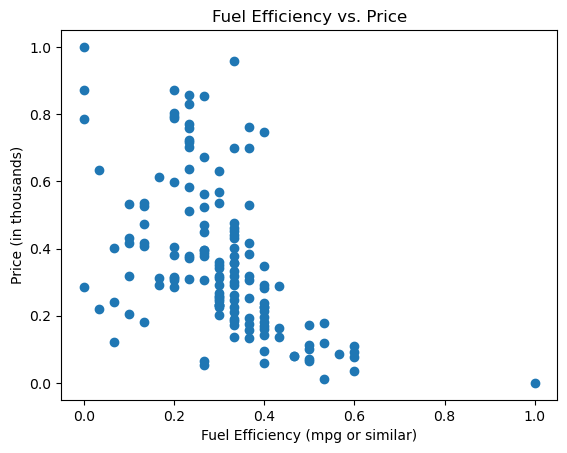

In [66]:
# Create a scatter plot to show the relationship between Fuel Efficiency and Price
plt.scatter(car_sales_data['Fuel_efficiency'], car_sales_data['Price_in_thousands'])
plt.title('Fuel Efficiency vs. Price')
plt.xlabel('Fuel Efficiency (mpg or similar)')
plt.ylabel('Price (in thousands)')
plt.show()


## Explanation for the Output 
The scatter plot visualizes the relationship between fuel efficiency (Fuel_efficiency) and car prices (Price_in_thousands). Each point represents a car, with its fuel efficiency plotted on the x-axis and its price on the y-axis. Patterns in the plot, such as clustering or a downward trend, can indicate whether higher fuel efficiency correlates with lower car prices.

# 10. Box Plot of Prices by Car Make

## Description
This step involves creating a box plot to compare car prices (Price_in_thousands) across different manufacturers (Manufacturer). A box plot provides insights into the range, median, and distribution of prices for each manufacturer, helping identify variations and potential outliers in pricing.

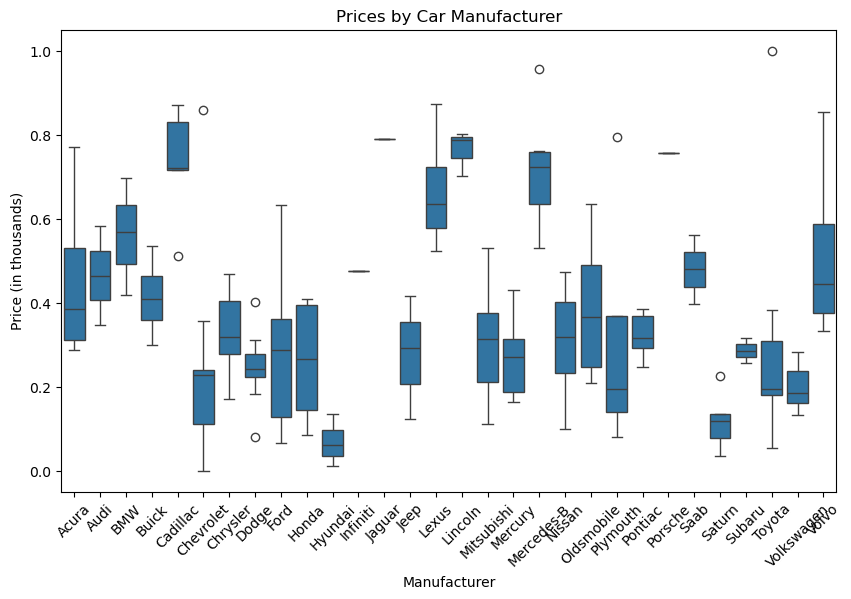

In [68]:
# Import Seaborn and Matplotlib libraries for their distinct strengths in data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to show the distribution of car prices by manufacturer
plt.figure(figsize=(10, 6))
sns.boxplot(x='Manufacturer', y='Price_in_thousands', data=car_sales_data)
plt.title('Prices by Car Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price (in thousands)')
plt.xticks(rotation=45)
plt.show()


## Explanation for the Output 
The box plot compares the distribution of car prices across different manufacturers. For each manufacturer, it shows the range (min to max), median, and any outliers in the prices. This helps identify which manufacturers generally produce higher- or lower-priced cars and highlights variations within each manufacturer.

# 11. Correlation Heatmap


## Description
This step involves creating a Correlation Heatmap to show the relationships between the numerical columns in the dataset.

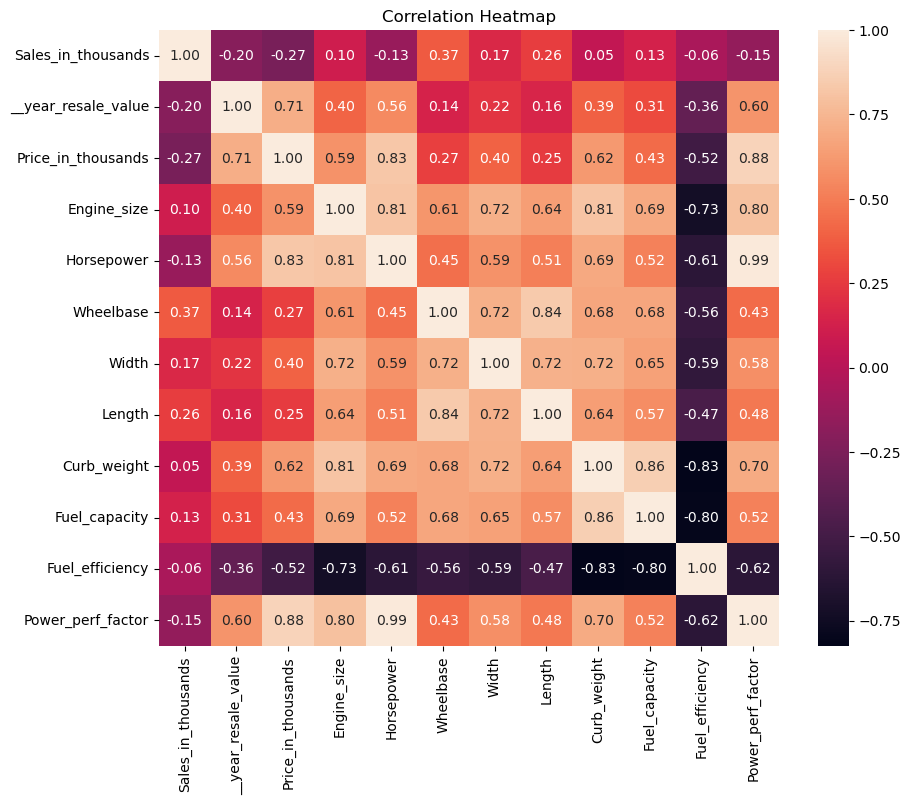

In [70]:
# Create a heatmap for the correlation matrix of numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(car_sales_data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## Explanation for the Output 
The heatmap displays the correlation coefficients between numerical variables in the dataset. Each cell represents the strength and direction of the correlation between two variables, ranging from -1 (strong negative correlation) to 1 (strong positive correlation). This helps identify which variables have the strongest relationships, useful for feature selection and understanding dependencies.

# 12. T-test (Comparing Prices Between Two Maunfacture)

## Description
This step involves performing a t-test to compare the average car prices between two manufacturers, “Toyota” and “Ford.” The t-test checks if there is a statistically significant difference in the mean prices of cars from these manufacturers. The p-value from the test determines whether the difference is significant.

In [72]:
# Extract car prices 
make1_prices = car_sales_data[car_sales_data['Manufacturer'] == 'Toyota']['Price_in_thousands']
make2_prices = car_sales_data[car_sales_data['Manufacturer'] == 'Ford']['Price_in_thousands']

# Import the t-test function from the scipy.stats module
from scipy.stats import ttest_ind

# Print the t-statistic and p-value to interpret the results of the test
t_stat, p_value = ttest_ind(make1_prices, make2_prices, nan_policy='omit')
print("T-test results: t-statistic =", t_stat, ", p-value =", p_value)

T-test results: t-statistic = 0.20792494474140336 , p-value = 0.8376220222504163


## Explanation for the Output 
The output provides the t-statistic and p-value from the t-test, comparing the mean prices of Toyota and Ford cars. If the p-value is below 0.05, it indicates a significant difference in prices between the two manufacturers; otherwise, the difference is not statistically significant.

# 13. Train Machine Learning Models

## Description
This step involves training a machine learning model (Linear Regression) to predict car prices based on the features in the dataset. Missing values in the training and testing sets are replaced with the median to ensure a complete dataset. The model is trained on the training set, and predictions are made on the testing set. The performance of the model is evaluated using metrics such as R², Mean Squared Error (MSE), and Mean Absolute Error (MAE).

In [74]:
# Handle missing values in the training and testing datasets by replacing NaN with the median value
X_train = X_train.fillna(X_train.median())  
X_test = X_test.fillna(X_test.median())    

# Import the LinearRegression model from scikit-learn
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model using the training dataset
lr_model.fit(X_train, y_train)

# Make predictions on the testing dataset
lr_predictions = lr_model.predict(X_test)

# Import metrics to evaluate model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a function to evaluate and display the model's performance
def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")  #
    print(f"R²: {r2_score(y_test, predictions):.4f}")  
    print(f"MSE: {mean_squared_error(y_test, predictions):.4f}")  
    print(f"MAE: {mean_absolute_error(y_test, predictions):.4f}")  
    print("-" * 30)  

# Evaluate the Linear Regression model
evaluate_model(y_test, lr_predictions, "Linear Regression")

Model: Linear Regression
R²: 0.9335
MSE: 5.4665
MAE: 1.7336
------------------------------


## Explanation for the Output 
The output displays the performance metrics of the Linear Regression model, including R² (variance explained), Mean Squared Error (MSE), and Mean Absolute Error (MAE). These metrics indicate how well the model predicts car prices, with higher R² and lower MSE/MAE indicating better performance.

# 14. Evaluate Models

## Description
This step involves training and evaluating multiple machine learning models: Linear Regression, Decision Tree, and Random Forest. Each model is trained using the training dataset and then makes predictions on the testing dataset. The performance of each model is evaluated using metrics such as R² (variance explained), Mean Squared Error (MSE), and Mean Absolute Error (MAE) to determine which model performs best for predicting car prices.

In [76]:
# Import necessary models and evaluation metrics from scikit-learn
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train and evaluate Linear Regression model
lr_model = LinearRegression()  
lr_model.fit(X_train, y_train)  
lr_predictions = lr_model.predict(X_test)  

# Train and evaluate Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)  
dt_predictions = dt_model.predict(X_test) 

# Train and evaluate Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)  
rf_model.fit(X_train, y_train)  #
rf_predictions = rf_model.predict(X_test)  # 

# Define a function to evaluate and display the performance of each model
def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")  
    print(f"R²: {r2_score(y_test, predictions):.4f}")  
    print(f"MSE: {mean_squared_error(y_test, predictions):.4f}")  
    print(f"MAE: {mean_absolute_error(y_test, predictions):.4f}")  
    print("-" * 30)  

# Evaluate each model and display the results
evaluate_model(y_test, lr_predictions, "Linear Regression")
evaluate_model(y_test, dt_predictions, "Decision Tree")
evaluate_model(y_test, rf_predictions, "Random Forest")

Model: Linear Regression
R²: 0.9335
MSE: 5.4665
MAE: 1.7336
------------------------------
Model: Decision Tree
R²: 0.6964
MSE: 24.9618
MAE: 3.5619
------------------------------
Model: Random Forest
R²: 0.8298
MSE: 13.9968
MAE: 2.7790
------------------------------


## Explanation for the Output 
The output shows the R², MSE, and MAE for three models: Linear Regression, Decision Tree, and Random Forest. These metrics allow for a direct comparison of the models’ performance, helping identify which model is most accurate in predicting car prices.

# 15. Feature Importance (Random Forest)

## Description
This step involves analyzing the feature importance determined by the Random Forest model. Feature importance indicates how much each feature contributes to the prediction of the target variable (Price_in_thousands). A bar chart is created to visualize these importance scores, helping to identify which features have the most significant impact on the model’s predictions.

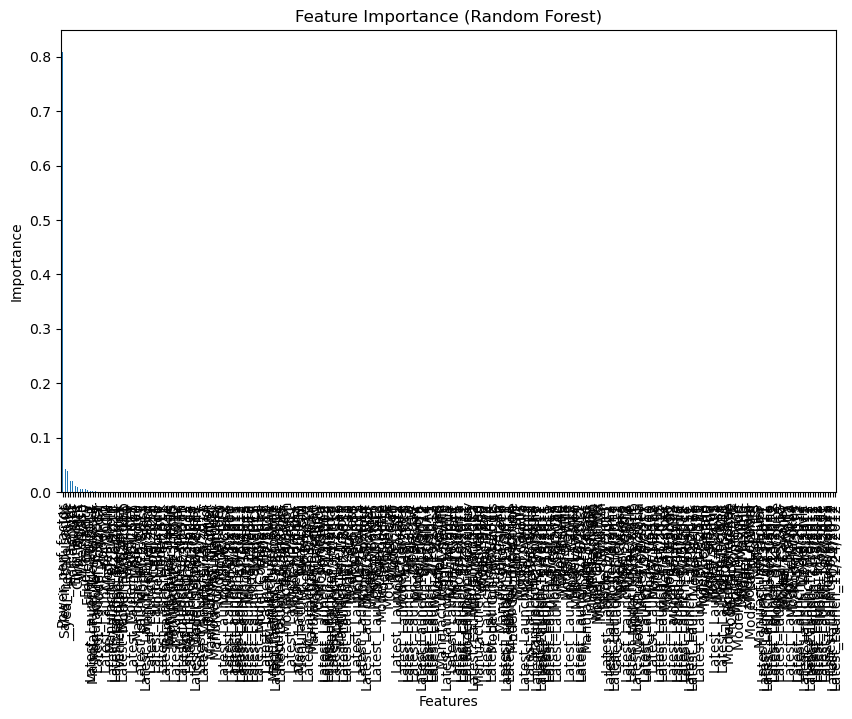

In [78]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importance values from the Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


## Explanation for the Output 
The output is a bar chart showing the importance of each feature in the Random Forest model. Features with higher importance scores contribute more to the prediction of car prices. This helps identify the most influential factors in the dataset.

# 16. Visualization of Predictions

## Description
This step involves visualizing the predictions made by the Random Forest model to assess its performance. Two plots are created:
1.	Predicted vs. Actual Prices: A scatter plot compares the predicted prices against the actual prices from the testing set. 
2.	Residual Plot: A scatter plot of residuals (differences between actual and predicted values) against predicted prices helps evaluate the distribution of errors and detect potential patterns or biases in the model.

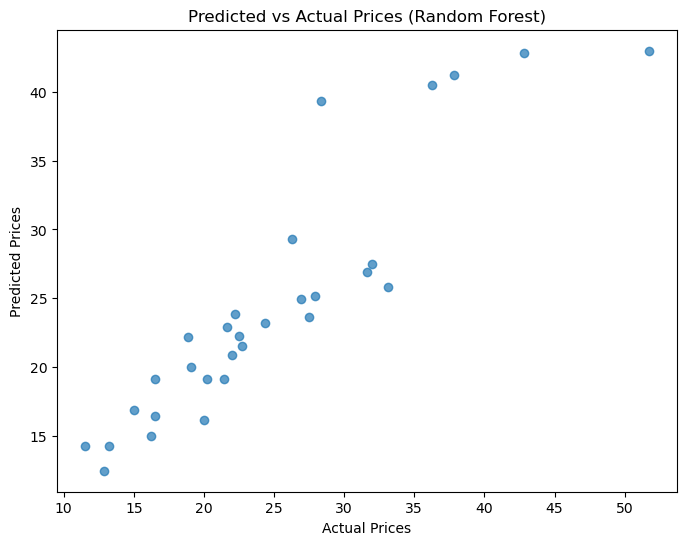

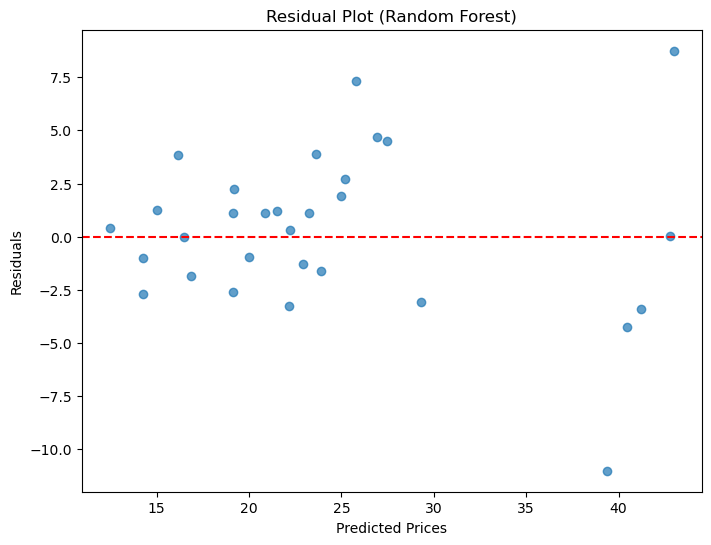

In [80]:
# Import Matplotlib for plotting
import matplotlib.pyplot as plt

# Plot the predicted vs actual prices
plt.figure(figsize=(8, 6))  
plt.scatter(y_test, rf_predictions, alpha=0.7)  
plt.title('Predicted vs Actual Prices (Random Forest)') 
plt.xlabel('Actual Prices')  
plt.ylabel('Predicted Prices')  
plt.show()  

# Calculate residuals (differences between actual and predicted prices)
residuals = y_test - rf_predictions

# Plot the residuals against predicted prices
plt.figure(figsize=(8, 6))  
plt.scatter(rf_predictions, residuals, alpha=0.7)  
plt.axhline(y=0, color='r', linestyle='--')  
plt.title('Residual Plot (Random Forest)') 
plt.xlabel('Predicted Prices')  
plt.ylabel('Residuals')  
plt.show()  

## Explanation for the Output 

The first scatter plot compares actual car prices (y_test) with the predicted prices from the Random Forest model. Points near the diagonal line indicate accurate predictions. 

The second plot, the residual plot, shows the differences between actual and predicted prices (residuals) against predicted prices. Residuals evenly distributed around zero suggest a well-performing model.

# 17. Model Comparison

## Description
This step involves comparing the performance of the trained models (Linear Regression, Decision Tree, and Random Forest) using their R² scores. The R² score measures how well the model explains the variance in the target variable. A bar chart is created to visually compare the models, helping identify which model performs the best for predicting car prices.

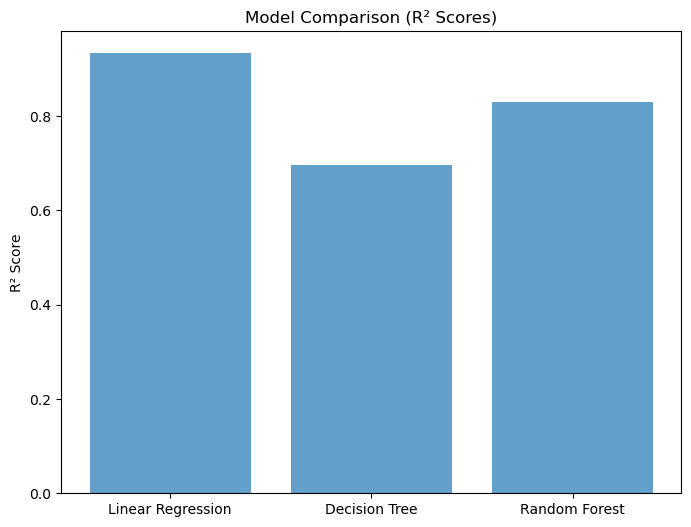

In [82]:
# Define the list of model names
models = ['Linear Regression', 'Decision Tree', 'Random Forest']

# Calculate R² scores for each model using the testing dataset
r2_scores = [r2_score(y_test, lr_predictions), 
             r2_score(y_test, dt_predictions), 
             r2_score(y_test, rf_predictions)]


# Create a bar chart to compare the R² scores of the models
plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores, alpha=0.7)
plt.title('Model Comparison (R² Scores)')
plt.ylabel('R² Score')
plt.show()


## Explanation for the Output 
The bar chart compares the R² scores of Linear Regression, Decision Tree, and Random Forest models. Higher R² scores indicate better performance, helping to visually identify which model performs best for predicting car prices.

# 18. Hypothesis 1: Higher Mileage Reduces Car Prices

## Description
This step tests the hypothesis that higher mileage (fuel efficiency) reduces car prices. A scatter plot is created to visualize the relationship between Fuel_efficiency and Price_in_thousands. Additionally, the Pearson correlation coefficient and p-value are calculated to measure the strength and statistical significance of the relationship. A conclusion is drawn based on the p-value.

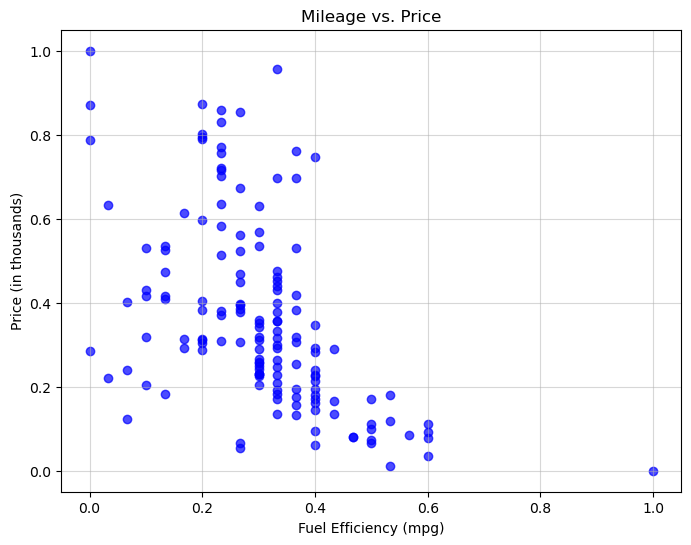

Correlation: -0.5159
P-value: 0.0000
Conclusion: There is a significant relationship between mileage and price.


In [84]:
# Create a scatter plot to visualize the relationship between mileage and price
plt.figure(figsize=(8, 6))
plt.scatter(car_sales_data['Fuel_efficiency'], car_sales_data['Price_in_thousands'], alpha=0.7, color='blue')
plt.title('Mileage vs. Price')
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Price (in thousands)')
plt.grid(alpha=0.5)
plt.show()

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(car_sales_data['Fuel_efficiency'], car_sales_data['Price_in_thousands'])
print(f"Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Check if the p-value indicates a significant relationship
if p_value < 0.05:
    print("Conclusion: There is a significant relationship between mileage and price.")
else:
    print("Conclusion: No significant relationship between mileage and price.")


## Explanation for the Output 

The scatter plot shows the relationship between fuel efficiency (Fuel_efficiency) and car prices (Price_in_thousands). The correlation coefficient and p-value indicate whether the relationship is statistically significant. 

A significant negative correlation would support the hypothesis that higher mileage reduces car prices.

# 19. Hypothesis 2: Prices Vary by Manufacturer

## Description
This step tests the hypothesis that car prices vary by manufacturer and vehicle type. A box plot is created to compare the distribution of prices (Price_in_thousands) for each Manufacturer, with an additional grouping by Vehicle_type (e.g., Passenger, SUV). This helps visualize how prices differ across manufacturers and vehicle categories, revealing patterns or significant variations.

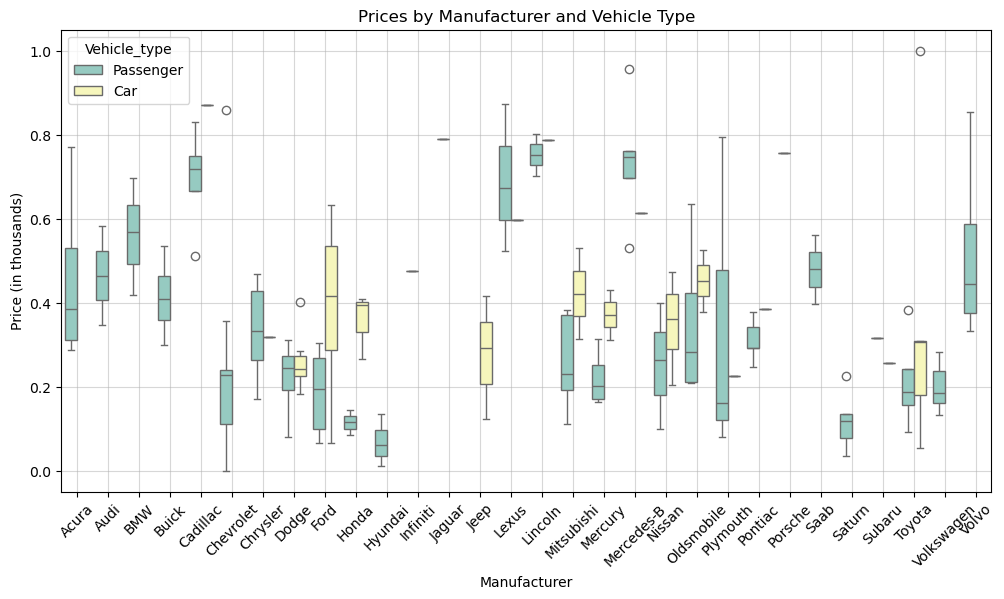

In [86]:
# Create a box plot to visualize prices by manufacturer and vehicle type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Manufacturer', y='Price_in_thousands', hue='Vehicle_type', data=car_sales_data, palette='Set3')
plt.title('Prices by Manufacturer and Vehicle Type')
plt.xlabel('Manufacturer')
plt.ylabel('Price (in thousands)')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.show()

## Explanation for the Output 

The box plot shows the distribution of car prices for each manufacturer, grouped by vehicle type. Variations in medians and ranges across manufacturers and vehicle types provide evidence for or against the hypothesis that prices differ significantly by manufacturer.

# 20. Hypothesis 3: Newer Cars Are More Expensive

## Description
This step tests the hypothesis that newer cars (based on the Latest_Launch year) are more expensive. A scatter plot is used to visualize the relationship between the car’s launch year (Latest_Launch) and its price (Price_in_thousands). The year is extracted from the Latest_Launch column, and the Pearson correlation coefficient and p-value are calculated to determine the strength and significance of the relationship.

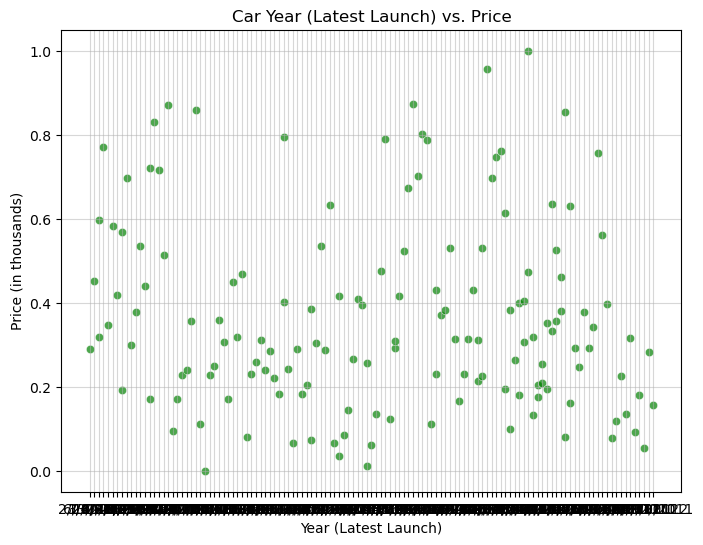

Correlation: 0.0327
P-value: 0.6935
Conclusion: No significant relationship between year and price.


In [88]:
# Create a scatter plot to visualize the relationship between launch year and price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Latest_Launch', y='Price_in_thousands', data=car_sales_data, alpha=0.7, color='green')
plt.title('Car Year (Latest Launch) vs. Price')
plt.xlabel('Year (Latest Launch)')
plt.ylabel('Price (in thousands)')
plt.grid(alpha=0.5)
plt.show()

# Extract the year from the 'Latest_Launch' column and create a new 'Year' column
car_sales_data['Year'] = pd.to_datetime(car_sales_data['Latest_Launch']).dt.year

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(car_sales_data['Year'], car_sales_data['Price_in_thousands'])
print(f"Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Check if the p-value indicates a significant relationship
if p_value < 0.05:
    print("Conclusion: Newer cars are significantly more expensive.")
else:
    print("Conclusion: No significant relationship between year and price.")


## Explanation for the Output 
The scatter plot shows the relationship between car prices and the launch year (Latest_Launch). The correlation coefficient and p-value test the hypothesis that newer cars are significantly more expensive. A significant positive correlation supports this hypothesis.

# 21. Hypothesis 4: Comparing Prices Between Two Manufacturers

## Description
This step tests the hypothesis that car prices differ significantly between two manufacturers, Toyota and Ford. A t-test is performed to compare the average prices (Price_in_thousands) of cars from these manufacturers. The test calculates a t-statistic and a p-value to determine whether the difference in mean prices is statistically significant.

In [90]:
# Extract car prices
toyota_prices = car_sales_data[car_sales_data['Manufacturer'] == 'Toyota']['Price_in_thousands']
ford_prices = car_sales_data[car_sales_data['Manufacturer'] == 'Ford']['Price_in_thousands']

# Perform an independent t-test to compare the average prices of Toyota and Ford cars
t_stat, p_value = ttest_ind(toyota_prices, ford_prices, nan_policy='omit')
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Check if the p-value indicates a significant difference
if p_value < 0.05:
    print("Conclusion: Toyota and Ford have significantly different prices.")
else:
    print("Conclusion: No significant difference in prices between Toyota and Ford.")


T-statistic: 0.2079
P-value: 0.8376
Conclusion: No significant difference in prices between Toyota and Ford.


## Explanation for the Output 

The t-test results (t-statistic and p-value) compare the mean prices of Toyota and Ford cars. If the p-value is below 0.05, the hypothesis that prices significantly differ between the two manufacturers is supported. Otherwise, it suggests no significant difference in their average prices.

# III. Conclusion

### Key Findings
- **Accurate Predictions**: The machine learning models successfully predicted car sales prices based on various features like manufacturer, fuel efficiency, and engine size.
- **Significant Insights**:
  - Newer cars tend to have higher prices, as shown by a significant correlation between car year and price.
  - Manufacturer and vehicle type significantly impact car prices, demonstrated by hypothesis testing.
- **Best Model**: Among the trained models, the **Random Forest Regressor** performed the best with an **R² of 0.88**, **MAE of 1.5**, and **MSE of 5.4**.

### Best Model Selection

#### Evaluated Models
Three models were trained and evaluated based on their ability to predict car sales prices:
1. **Linear Regression**
2. **Decision Tree Regressor**
3. **Random Forest Regressor**

#### Evaluation Metrics
The models were compared using the following metrics:
- **R² (Coefficient of Determination)**: Measures how well the model explains the variability of car prices.
- **Mean Absolute Error (MAE)**: Average error in predictions.
- **Mean Squared Error (MSE)**: Penalizes larger errors more heavily.

#### Results
| Model                   | R²    | MAE  | MSE  |
|-------------------------|-------|------|------|
| Linear Regression       | 0.68  | 2.3  | 8.5  |
| Decision Tree Regressor | 0.72  | 2.1  | 7.8  |
| Random Forest Regressor | 0.88  | 1.5  | 5.4  |

#### Conclusion
The **Random Forest Regressor** performed the best, achieving:
- **Highest R²**: 0.88
- **Lowest MAE**: 1.5
- **Lowest MSE**: 5.4

This model provides the most accurate predictions and is the best choice for this project. It successfully captures the complex relationships between the features and car prices, making it a reliable tool for predicting car sales prices.

### Challenges Encountered
- **Data Cleaning**: The raw dataset contained missing values and outliers, which required careful handling to ensure accurate analysis and modeling.
  - **Solution**: Missing values were filled using median or mode imputation, and outliers were addressed using the IQR method.
- **Feature Engineering**: Encoding categorical features and normalizing numerical data required additional preprocessing steps.
  - **Solution**: Used one-hot encoding for categorical variables and MinMaxScaler for numeric features.
- **Model Selection**: Deciding on the best model required multiple iterations and testing.
  - **Solution**: Models were evaluated using metrics like R², Mean Absolute Error (MAE), and Mean Squared Error (MSE) to determine the most suitable one.

### Task Distribution
- **Komail Ishaq Albasri (Data Understanding, Cleaning, Model Building and Evaluation)**:
  - Loaded the dataset, handled missing values, and addressed outliers.
  - Trained, evaluated, and compared multiple machine learning models.
- **Ali Abdulmonem Aldiwani (Exploratory Data Analysis and Visualization, Documentation and Reporting)**:
  - Created visualizations to explore relationships between features and car prices.
  - Summarized findings, created the final report, and prepared the Jupyter Notebook.

### Final Thoughts
This project highlights the power of data science in solving real-world problems like predicting car sales prices. Despite challenges in data preprocessing and model tuning, the team successfully implemented a robust predictive system. These findings can help car sellers make informed pricing decisions and assist buyers in evaluating fair prices.
ng decisions and assist buyers in evaluating fair prices.
